#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Data Preparation

In [2]:
ds = pd.read_csv('/content/twitter_training.csv')

In [3]:
ds.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
ds.drop_duplicates(keep=False, inplace=True)

In [6]:
ds=ds.rename(columns={"2401":"id","Borderlands":"topic","Positive":"sentiment","im getting on borderlands and i will murder you all ,":"comment"})

In [7]:
ds.head()

,id,topic,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
ds["topic"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [9]:
ds["comment"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: comment, Length: 69828, dtype: bool

In [10]:
ds=ds.dropna()

In [11]:
ds.isnull().sum()

id           0
topic        0
sentiment    0
comment      0
dtype: int64

In [12]:
ds["comment"].isnull().sum()

0

In [13]:
ds.head()

,id,topic,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


#Data Preprocessing

##Label Encoding Sentiments and Topic

In [14]:
encoder = LabelEncoder()
ds["sentiment"] = encoder.fit_transform(ds["sentiment"])
ds["topic"] = encoder.fit_transform(ds["topic"])

In [15]:
ds.head()

,id,topic,sentiment,comment
0,2401,4,3,I am coming to the borders and I will kill you...
1,2401,4,3,im getting on borderlands and i will kill you ...
2,2401,4,3,im coming on borderlands and i will murder you...
3,2401,4,3,im getting on borderlands 2 and i will murder ...
4,2401,4,3,im getting into borderlands and i can murder y...


##Changing Text to Lowercase

In [16]:
ds["comment"]=ds["comment"].str.lower()

##Using Stemming to reduce text to base form

In [17]:
ps = PorterStemmer()

def stemmer(word):
    word = word.lower()
    word = word_tokenize(word)

    full_txt = []
    for i in word:
        if i not in "!@#$%^&*()-_=+`~;:'\",<.>/?|":
            full_txt.append(ps.stem(i))
    return ' '.join(full_txt)

In [18]:
ds["comment"]=ds["comment"].apply(stemmer)

In [19]:
ds.head()

,id,topic,sentiment,comment
0,2401,4,3,i am come to the border and i will kill you all
1,2401,4,3,im get on borderland and i will kill you all
2,2401,4,3,im come on borderland and i will murder you all
3,2401,4,3,im get on borderland 2 and i will murder you m...
4,2401,4,3,im get into borderland and i can murder you all


#Tokenization

In [20]:
ds['tokenized'] = ds['comment'].apply(word_tokenize)

In [21]:
y=ds['sentiment']
X=ds['tokenized']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [22]:
ds.head()

,id,topic,sentiment,comment,tokenized
0,2401,4,3,i am come to the border and i will kill you all,"[i, am, come, to, the, border, and, i, will, k..."
1,2401,4,3,im get on borderland and i will kill you all,"[im, get, on, borderland, and, i, will, kill, ..."
2,2401,4,3,im come on borderland and i will murder you all,"[im, come, on, borderland, and, i, will, murde..."
3,2401,4,3,im get on borderland 2 and i will murder you m...,"[im, get, on, borderland, 2, and, i, will, mur..."
4,2401,4,3,im get into borderland and i can murder you all,"[im, get, into, borderland, and, i, can, murde..."


In [23]:
ds[['tokenized']]

,tokenized
0,"[i, am, come, to, the, border, and, i, will, k..."
1,"[im, get, on, borderland, and, i, will, kill, ..."
2,"[im, come, on, borderland, and, i, will, murde..."
3,"[im, get, on, borderland, 2, and, i, will, mur..."
4,"[im, get, into, borderland, and, i, can, murde..."
...,...
74676,"[just, realiz, that, the, window, partit, of, ..."
74677,"[just, realiz, that, my, mac, window, partit, ..."
74678,"[just, realiz, the, window, partit, of, my, ma..."
74679,"[just, realiz, between, the, window, partit, o..."


In [24]:
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

In [25]:
import string
punctuation = string.punctuation
def punctuationRemoval(text):
  splitText = text.split()
  Words = [word for word in splitText if (word not in "?!" and word not in punctuation)]
  return Words

In [26]:
X_train = X_train.apply(punctuationRemoval)
X_test = X_test.apply(punctuationRemoval)

In [27]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [28]:
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

In [29]:
from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
stop_words = set(stopwords.words('english'))
def stopwordsRemoval(text):
  splitText = text.split()
  Words = [word for word in splitText if word not in stop_words]
  return Words

In [30]:
X_train = X_train.apply(stopwordsRemoval)
X_test = X_test.apply(stopwordsRemoval)

In [31]:
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

In [32]:
customSet = set(['’', '...', 'n\'t', "\'s", '..',"\'\'","``","`","thi","game","\'m","1",'2','3','4','5','6','7','8','9','10','wa','ha','get','like'])

In [33]:
def customRemoval(text):
  splitText = text.split()
  Words = [word for word in splitText if word not in customSet]
  return Words

In [34]:
X_train = X_train.apply(customRemoval)
X_test = X_test.apply(customRemoval)

In [35]:
X_train = X_train.apply(lambda tokens: ' '.join(tokens))
X_test = X_test.apply(lambda tokens: ' '.join(tokens))

#Feature Extraction

In [36]:
feature_extraction = TfidfVectorizer()
X_train_preprocessed=feature_extraction.fit_transform(X_train)
X_test_preprocessed=feature_extraction.transform(X_test)

#Classification using Multinomial Naive Bayes

In [37]:
gnb = MultinomialNB()
gnb.fit(X_train_preprocessed,y_train)

MultinomialNB()

#Model Evaluation

In [38]:
gnb.score(X_train_preprocessed,y_train)

0.7595601951499498

In [39]:
gnb.score(X_test_preprocessed,y_test)

0.7121538240780599

In [40]:
cv = cross_val_score(gnb,X_train_preprocessed,y_train)
cv

array([0.68962425, 0.68908618, 0.69605381, 0.69524664, 0.69461883])

In [41]:
cross_val_score(gnb,X_test_preprocessed,y_test)

array([0.58823529, 0.57998565, 0.59433286, 0.59203445, 0.59526372])

#Data Visualization

##Data Distribution

Text(0, 0.5, 'Count')

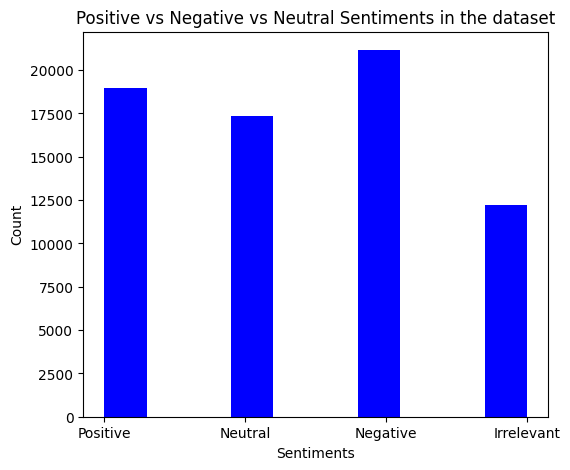

In [86]:
labelMap = {0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}

labels = [labelMap[category] for category in y]

plt.figure(figsize=(6,5))
plt.hist(labels,color="blue")
plt.title('Positive vs Negative vs Neutral Sentiments in the dataset')
plt.xlabel('Sentiments')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

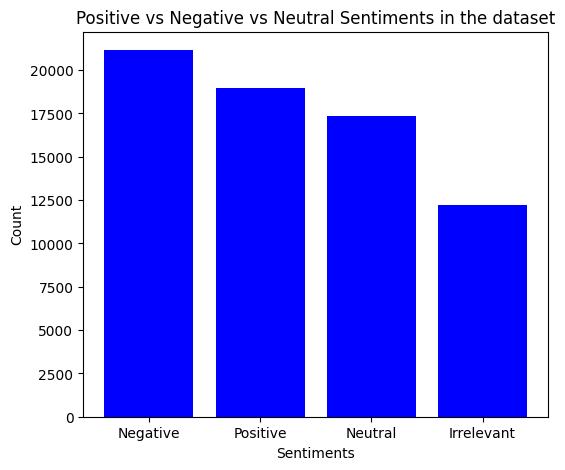

In [87]:
valueCounts = y.value_counts()

labels1 = valueCounts.index.tolist()
counts = valueCounts.values.tolist()

ls = ['Negative','Positive','Neutral','Irrelevant']

plt.figure(figsize=(6,5))
plt.bar(ls,counts,color="blue")
plt.title('Positive vs Negative vs Neutral Sentiments in the dataset')
plt.xlabel('Sentiments')
plt.ylabel('Count')

##Word Frequency Analysis

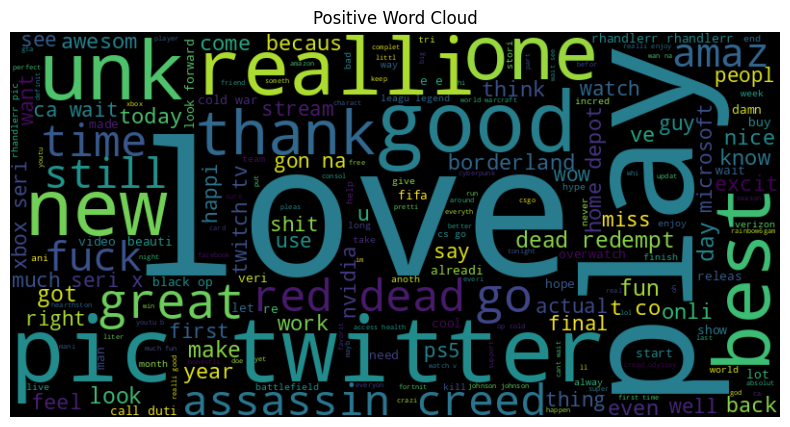

In [88]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 3]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Word Cloud")
plt.axis('off')
plt.show()

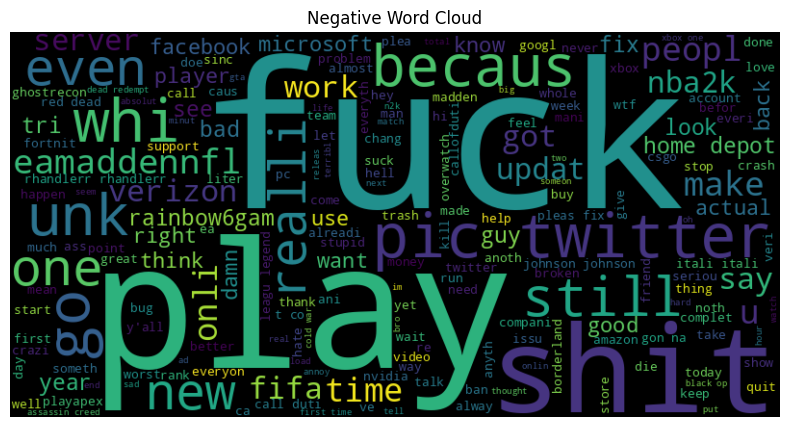

In [89]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 1]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Word Cloud")
plt.axis('off')
plt.show()

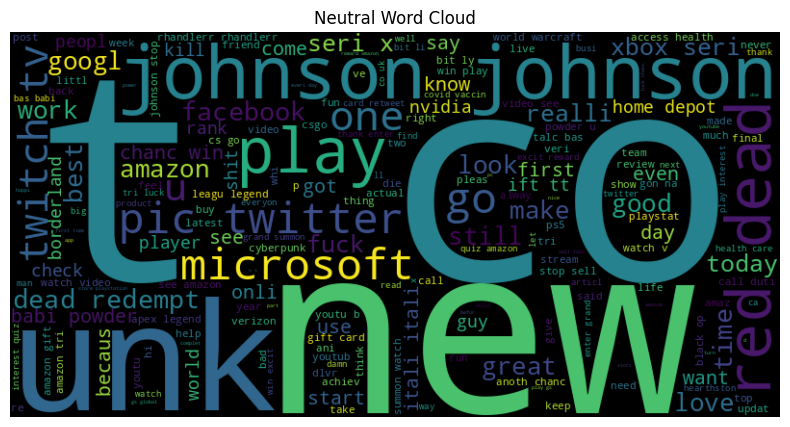

In [90]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 2]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Neutral Word Cloud")
plt.axis('off')
plt.show()

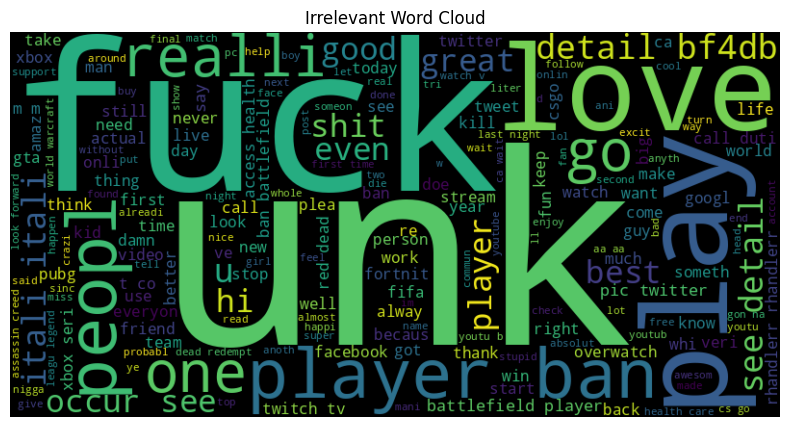

In [91]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 0]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Irrelevant Word Cloud")
plt.axis('off')
plt.show()

In [92]:
pos_count = {}
for i in X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 3]:
  for j in i.split(" "):
    if(j not in pos_count):
      pos_count[j]=1
    else:
      pos_count[j]+=1
posCount = pd.DataFrame(list(pos_count.items()), columns=['Word', 'Frequency'])
topPos = posCount.nlargest(10, 'Frequency')
topPos

,Word,Frequency
98,play,1934
62,love,1521
355,good,1233
2,thank,993
600,realli,983
20,new,913
146,look,903
131,go,871
505,time,862
70,best,854


In [93]:
neg_count = {}
for i in X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 1]:
  for j in i.split(" "):
    if(j not in neg_count):
      neg_count[j]=1
    else:
      neg_count[j]+=1
negCount = pd.DataFrame(list(neg_count.items()), columns=['Word', 'Frequency'])
topNeg = negCount.nlargest(10, 'Frequency')
topNeg

,Word,Frequency
93,fuck,1798
73,play,1625
289,whi,1425
39,fix,1148
91,shit,1143
16,go,1012
96,make,937
192,time,877
149,pleas,868
257,eamaddennfl,862


In [94]:
neu_count = {}
for i in X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 2]:
  for j in i.split(" "):
    if(j not in neu_count):
      neu_count[j]=1
    else:
      neu_count[j]+=1
neuCount = pd.DataFrame(list(neu_count.items()), columns=['Word', 'Frequency'])
topNeu = neuCount.nlargest(10, 'Frequency')
topNeu

,Word,Frequency
371,johnson,1467
114,play,1180
119,http,1115
42,amazon,913
503,one,691
79,unk,661
319,new,656
279,go,652
590,googl,648
63,facebook,626


In [95]:
irr_count = {}
for i in X_train[ds['sentiment'][ds.index.isin(X_train.index)] == 0]:
  for j in i.split(" "):
    if(j not in irr_count):
      irr_count[j]=1
    else:
      irr_count[j]+=1
irrCount = pd.DataFrame(list(irr_count.items()), columns=['Word', 'Frequency'])
topIrr = irrCount.nlargest(10, 'Frequency')
topIrr

,Word,Frequency
129,player,876
162,see,836
160,ban,732
32,play,637
110,love,616
322,peopl,608
102,go,585
42,one,562
54,fuck,537
55,unk,508


In [96]:
ls = [topPos,topNeg,topNeu,topIrr]
idx = ['Positive','Negative','Neutral','Irrelevant']

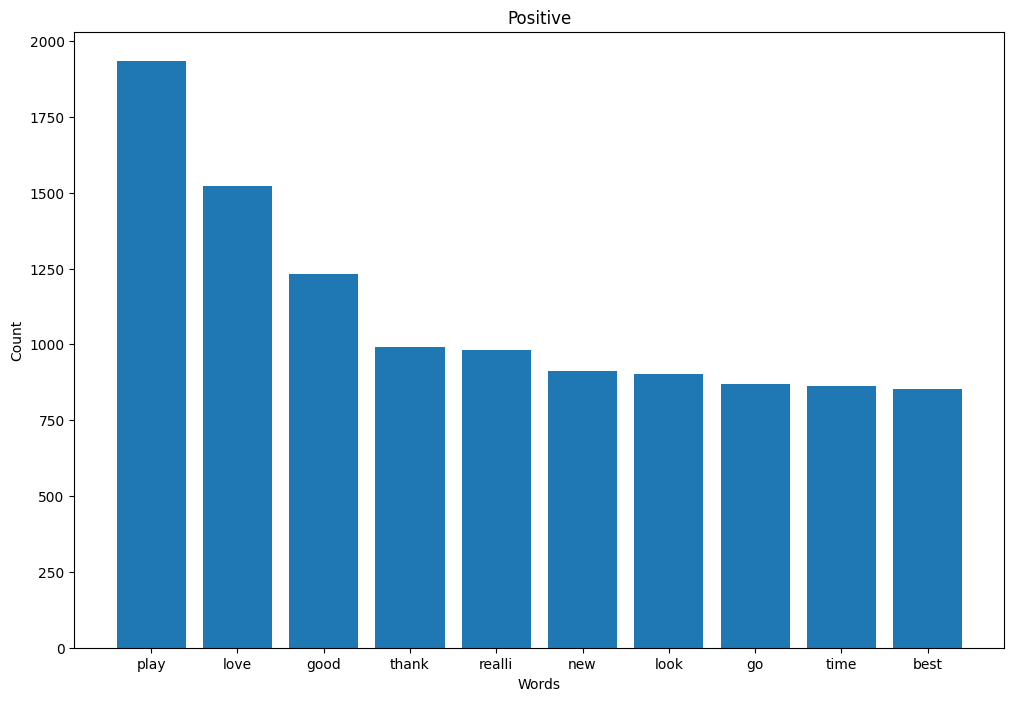

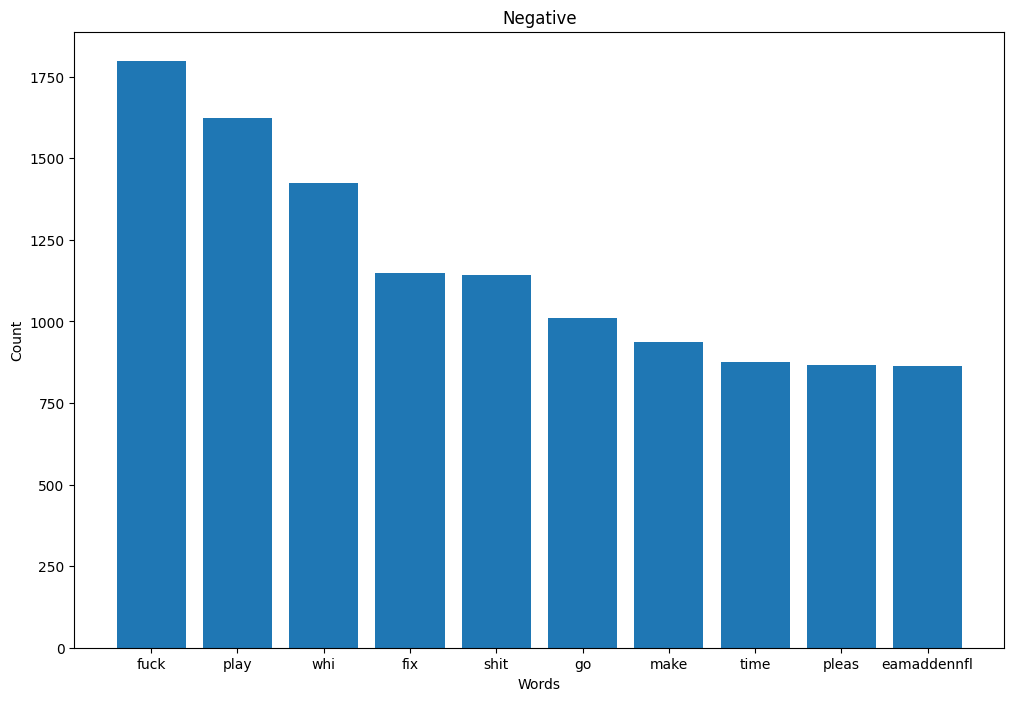

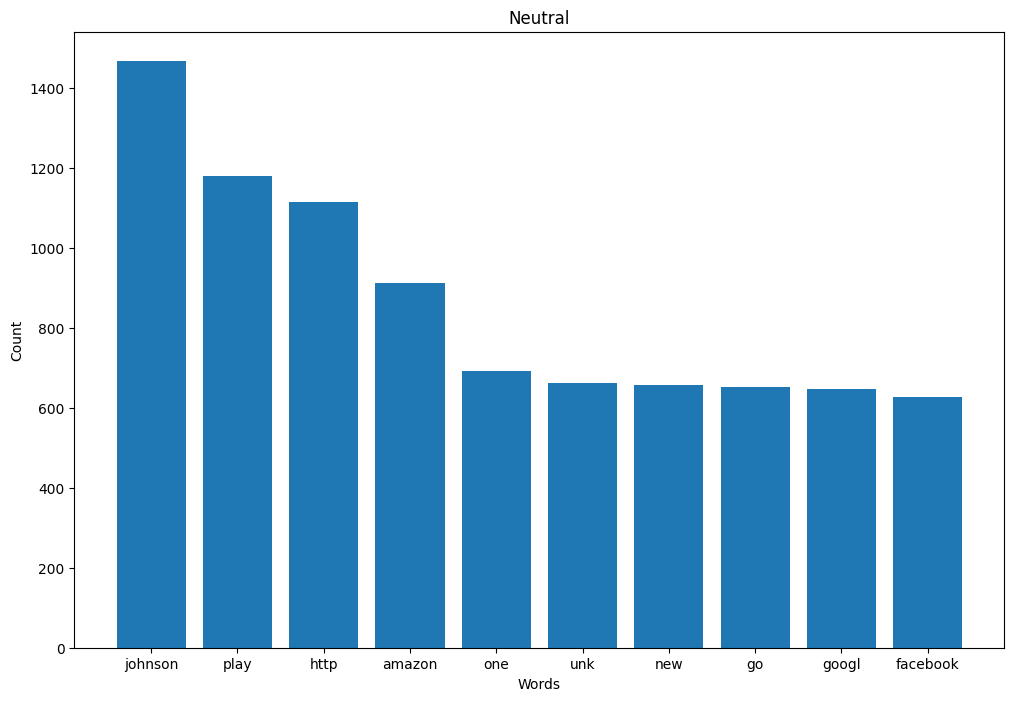

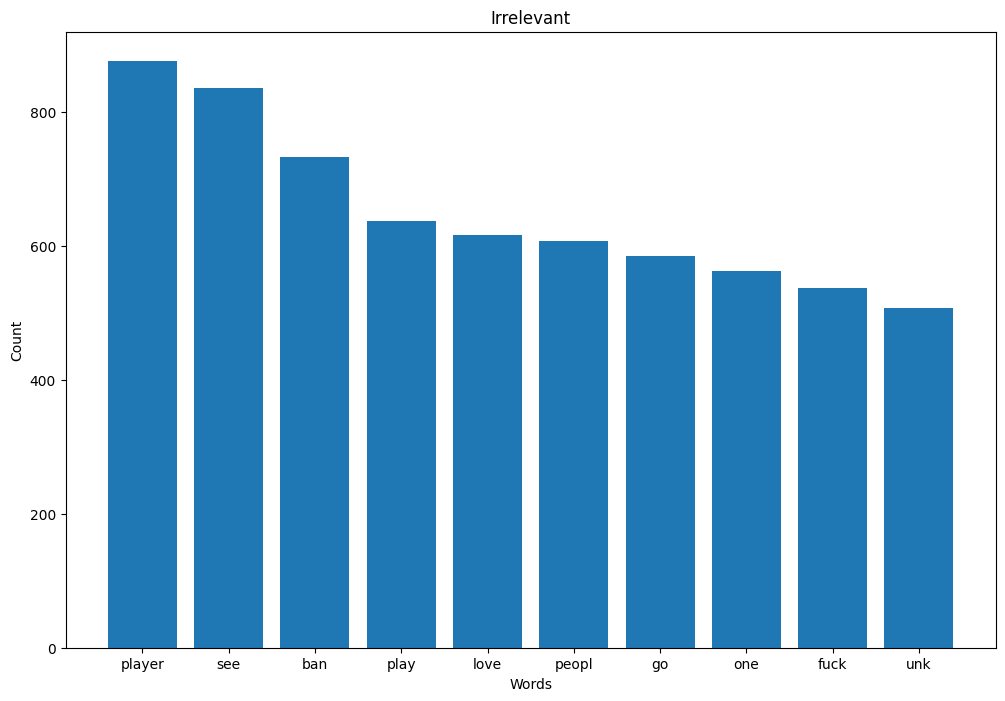

In [97]:
for index,i in enumerate(ls):
  plt.figure(figsize=(12, 8))
  plt.bar(i['Word'],i['Frequency'])
  plt.title(idx[index])
  plt.xlabel('Words')
  plt.ylabel('Count')
  plt.show()

##Model Performance Evaluation

In [98]:
y_pred = gnb.predict(X_test_preprocessed)

<Axes: >

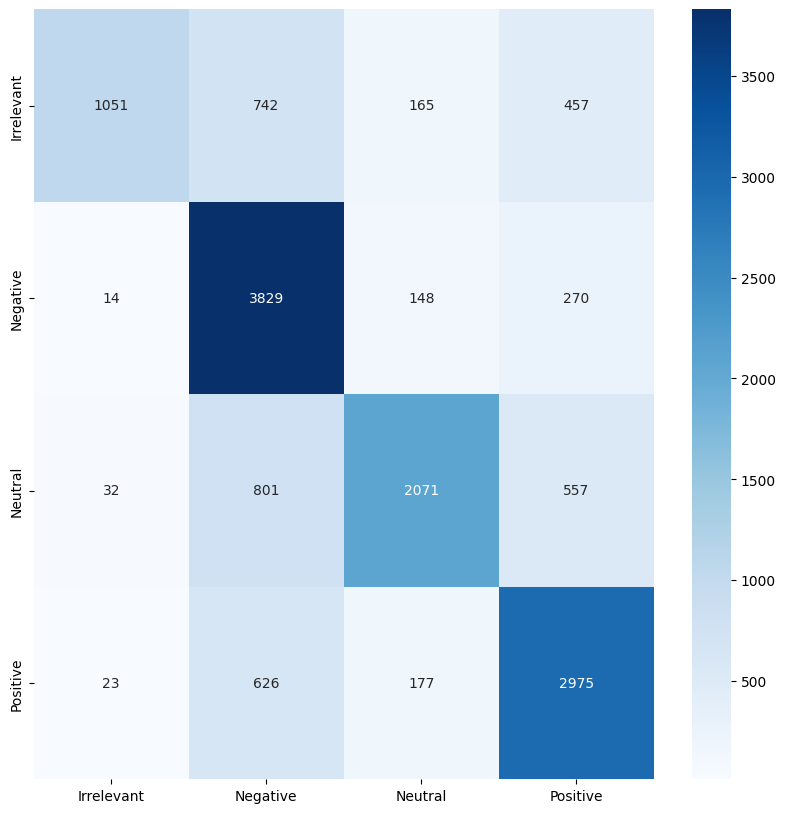

In [99]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labelMap.values(), yticklabels=labelMap.values())

In [100]:
y_train.info()
y_train_new = pd.DataFrame(y_train)
y_train_new

y_test_new = pd.DataFrame(y_test)

<class 'pandas.core.series.Series'>
Index: 55752 entries, 68618 to 15033
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
55752 non-null  int64
dtypes: int64(1)
memory usage: 871.1 KB


In [101]:
X_train_new = X_train[(ds['sentiment'][ds.index.isin(X_train.index)] == 1) | (ds['sentiment'][ds.index.isin(X_train.index)] == 3)]
X_test_new = X_test[(ds['sentiment'][ds.index.isin(X_test.index)] == 1) | (ds['sentiment'][ds.index.isin(X_test.index)] == 3)]

In [102]:
y_train_new = y_train[(y_train==1) | (y_train==3)]
y_test_new = y_test[(y_test==1) | (y_test==3)]

y_train_new = y_train_new.map({1: 0, 3: 1})
y_test_new = y_test_new.map({1: 0, 3: 1})

In [103]:
y_test_new.unique()

array([0, 1])

In [104]:
X_train_new = feature_extraction.fit_transform(X_train_new)
X_test_new = feature_extraction.transform(X_test_new)

In [105]:
gnb.fit(X_train_new,y_train_new)

MultinomialNB()

In [106]:
gnb.score(X_train_new,y_train_new)

0.8982105000623519

In [107]:
gnb.score(X_test_new,y_test_new)

0.8765814934259489

In [108]:
y_pred = gnb.predict(X_test_new)

In [109]:
precision, recall, thresholds = precision_recall_curve(y_test_new,y_pred)

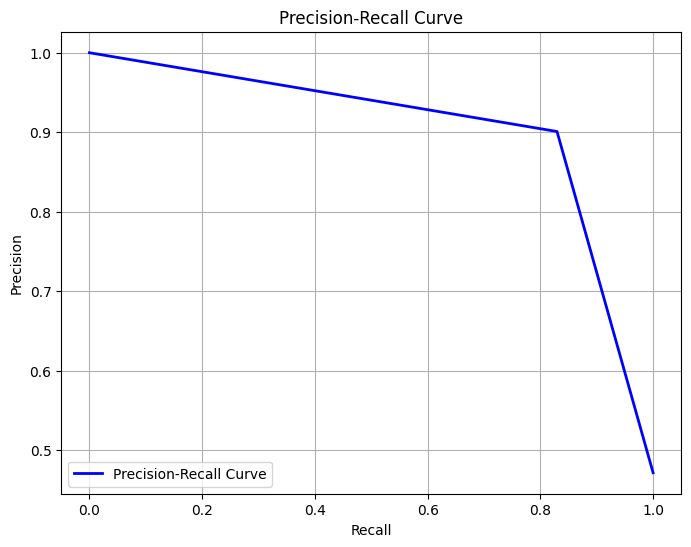

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve', color='blue', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

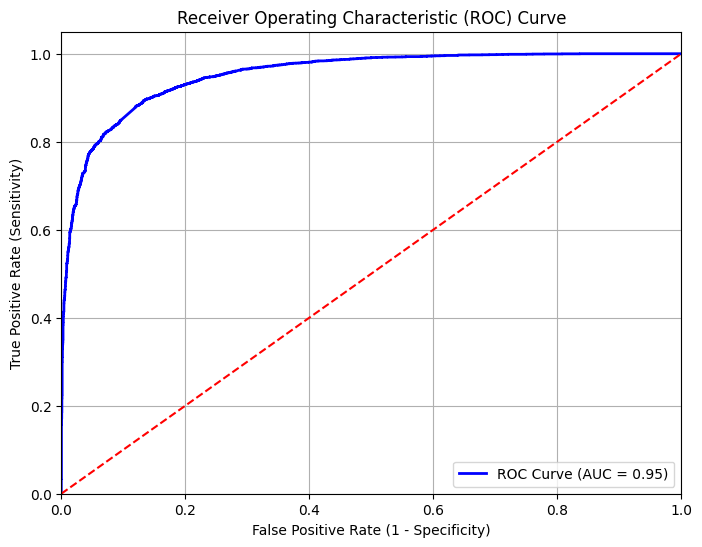

In [111]:
y_scores = gnb.predict_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_new, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#Using Validation Dataset

In [42]:
df = pd.read_csv('/content/twitter_validation.csv')

In [43]:
df.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [45]:
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [46]:
df.drop_duplicates(keep=False, inplace=True)

In [47]:
df=df.rename(columns={"3364":"id","Facebook":"topic","Irrelevant":"sentiment","I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"comment"})

In [48]:
df.head()

,id,topic,sentiment,comment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [49]:
df["topic"].unique()

array(['Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA', 'MaddenNFL',
       'TomClancysRainbowSix', 'AssassinsCreed', 'CallOfDuty', 'Dota2',
       'Verizon', 'NBA2K', 'Nvidia', 'GrandTheftAuto(GTA)',
       'RedDeadRedemption(RDR)', 'Hearthstone', 'ApexLegends',
       'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)', 'Borderlands',
       'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'Facebook',
       'HomeDepot', 'Cyberpunk2077', 'TomClancysGhostRecon',
       'WorldOfCraft', 'LeagueOfLegends', 'Battlefield'], dtype=object)

In [50]:
df["comment"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: comment, Length: 999, dtype: bool

In [51]:
labelMap = {'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}
df["sentiment"] = df["sentiment"].map(labelMap)

In [52]:
df.head()

,id,topic,sentiment,comment
0,352,Amazon,2,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,2,Now the President is slapping Americans in the...
4,6273,FIFA,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [53]:
df["comment"].isnull().sum()

0

In [54]:
df=df.dropna()

In [55]:
df

,id,topic,sentiment,comment
0,352,Amazon,2,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,2,Now the President is slapping Americans in the...
4,6273,FIFA,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),0,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,3,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,3,Bought a fraction of Microsoft today. Small wins.


In [56]:
df["comment"] = df["comment"].replace(',', '').replace('.', '')

In [57]:
df["comment"]

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
994    ⭐️ Toronto is the arts and culture capital of ...
995    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Today sucked so it’s time to drink wine n play...
997    Bought a fraction of Microsoft today. Small wins.
998    Johnson & Johnson to stop selling talc baby po...
Name: comment, Length: 999, dtype: object

In [58]:
df["comment"]=df["comment"].str.lower()

In [59]:
ps = PorterStemmer()

def stemmer(word):
    word = word.lower()
    word = word_tokenize(word)

    full_txt = []
    for i in word:
        if i not in "!@#$%^&*()-_=+`~;:'\",<.>/?|":
            full_txt.append(ps.stem(i))
    return ' '.join(full_txt)


In [60]:
df["comment"]=df["comment"].apply(stemmer)

In [61]:
df['tokenized'] = df['comment'].apply(word_tokenize)

In [62]:
y1=df['sentiment']
X1=df['tokenized']

In [63]:
X1 = X1.apply(lambda tokens: ' '.join(tokens))

In [64]:
X1 = X1.apply(punctuationRemoval)

In [65]:
X1 = X1.apply(lambda tokens: ' '.join(tokens))

In [66]:
X1 = X1.apply(stopwordsRemoval)

In [67]:
X1 = X1.apply(lambda tokens: ' '.join(tokens))

In [68]:
X1_preprocessed=feature_extraction.transform(X1)

In [69]:
gnb.score(X1_preprocessed,y1)

0.7527527527527528

In [70]:
cv = cross_val_score(gnb,X1_preprocessed,y1)
cv

array([0.46      , 0.52      , 0.495     , 0.51      , 0.51256281])

#Prediction with New Data

In [71]:
inp = str(input("Enter the twitter review"))

Enter the twitter reviewThis is bad. I hate it


##Processing Data

###Replacing Major Punctuations

In [72]:
inp.replace(',', '').replace('!', '').replace('.', '')

'This is bad I hate it'

###Changing Text to Lowercase

In [73]:
inp.lower()

'this is bad. i hate it'

###Using Stemming to reduce text to base form

In [74]:
input=stemmer(inp)

In [75]:
inp

'This is bad. I hate it'

###Tokenization

In [76]:
inp=word_tokenize(inp)

In [77]:
inp = ' '.join(inp)

In [78]:
inp = punctuationRemoval(inp)

In [79]:
inp = ' '.join(inp)

In [80]:
inp = stopwordsRemoval(inp)

In [81]:
inp = ' '.join(inp)

###Feature Extraction

In [82]:
test_comment=feature_extraction.transform(pd.Series(inp))

In [83]:
test_comment

<1x24263 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [84]:
y_pred = gnb.predict(test_comment)
print(y_pred)
labelMap1 = {0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}

[1]


##Output

In [85]:
print("Your twitter comment is",labelMap1[y_pred[0]])

Your twitter comment is Negative
